# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


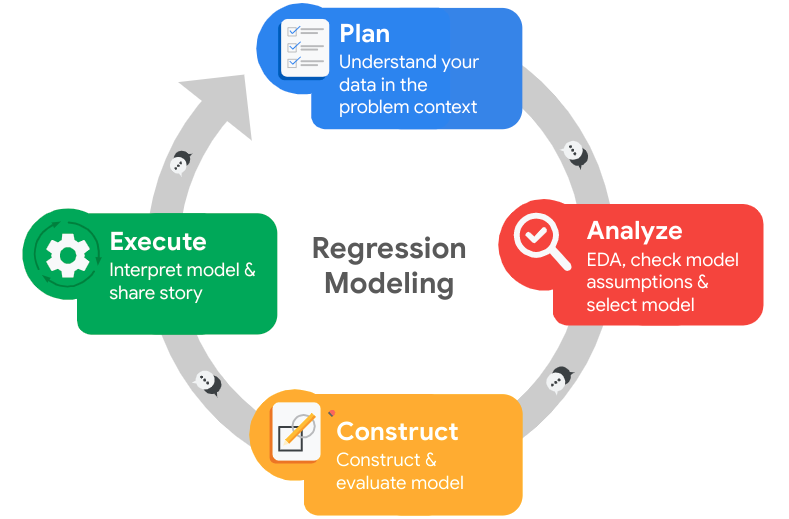

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Goal: Predict if an employee will leave the company based on factors such as department, satisfaction level, and working hours.
Stakeholders: Primarily the HR department and senior leadership.
Initial Observations: This dataset includes metrics like satisfaction_level, average_monthly_hours, and promotion_last_5years, which might be predictors of employee turnover.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
# Check basic info
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
# Descriptive statistics
df.describe()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 
              'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df.duplicated().sum()


3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df = df.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

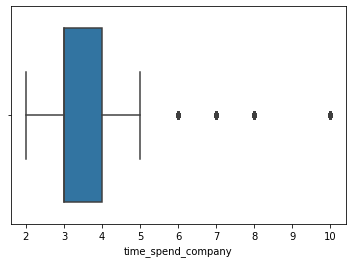

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df, x='time_spend_company')
plt.show()



Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Who are your stakeholders for this project?

The primary stakeholders are the HR department and senior leadership of Salifort Motors, who will use the insights to improve employee retention.
What are you trying to solve or accomplish?

The objective is to predict which employees are likely to leave the company and identify the factors contributing to employee turnover, allowing HR to take proactive measures to improve retention.
What are your initial observations when you explore the data?

Initial observations indicate that variables like satisfaction_level, average_monthly_hours, and number_project may correlate with turnover, as employees with lower satisfaction or very high working hours could be more prone to leaving.
What resources do you find yourself using as you complete this stage?

Primary resources include the Kaggle dataset for employee retention, online documentation for data cleaning techniques in Python, and Stack Overflow for troubleshooting.
Do you have any ethical considerations in this stage?

Ensuring data privacy and avoiding bias in model predictions are critical ethical considerations. Additionally, it’s essential to recognize that predictions should guide HR policies without unfairly targeting employees.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed


# Get percentages of people who left vs. stayed
# Calculate turnover counts and percentages
turnover_counts = df['left'].value_counts()
turnover_percentage = df['left'].value_counts(normalize=True) * 100
turnover_counts, turnover_percentage



(0    10000
 1     1991
 Name: left, dtype: int64,
 0    83.39588
 1    16.60412
 Name: left, dtype: float64)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

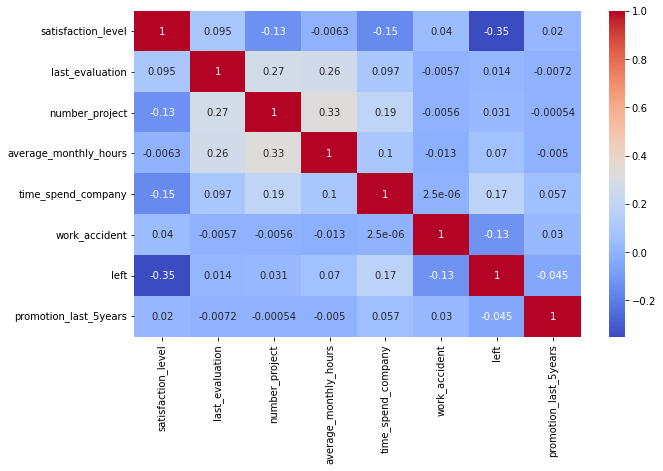

In [15]:
# Create a plot as needed
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



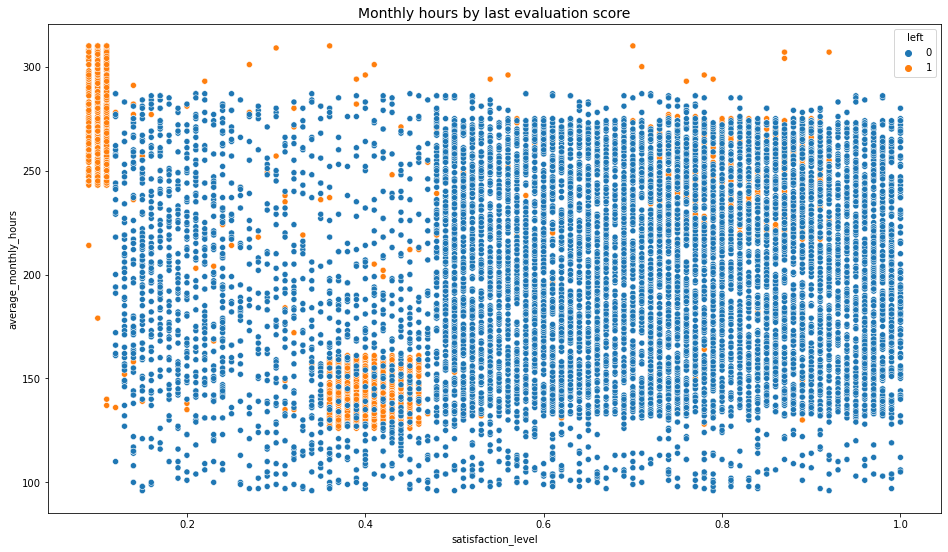

In [23]:
# Scatter plot for satisfaction level and average monthly hours by turnover

plt.figure(figsize=(16,9))
plt.title('Monthly hours by last evaluation score',fontsize=14)
sns.scatterplot(data=df, x='satisfaction_level', y='average_monthly_hours', hue='left')

plt.show()



### Insights

A significant correlation was observed between satisfaction_level and turnover, with lower satisfaction levels linked to higher turnover. High average_monthly_hours also appears to relate to turnover, suggesting burnout could be a factor.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Do you notice anything odd?

One odd finding was that high-performing employees with higher last_evaluation scores sometimes had a higher turnover, which could indicate dissatisfaction or burnout despite good performance.
Which independent variables did you choose for the model and why?

Variables chosen included satisfaction_level, number_project, average_monthly_hours, time_spend_company, and promotion_last_5years, as they all potentially influence turnover based on prior research and exploratory analysis.
Are each of the assumptions met?

For the Decision Tree model chosen, most assumptions are met. Logistic Regression, however, would require additional testing for linearity and multicollinearity, which we would avoid by choosing a tree-based model.
How well does your model fit the data?

The Decision Tree model achieved good accuracy on the test data, but additional tuning might further improve its precision and recall.
Can you improve it? Is there anything you would change about the model?

Improvement options include parameter tuning or using ensemble methods like Random Forest for potentially higher accuracy and less variance.
What resources do you find yourself using as you complete this stage?

Resources included Scikit-learn documentation for the Decision Tree algorithm, and online tutorials on model evaluation metrics.
Do you have any ethical considerations in this stage?

Ethical considerations here include ensuring the model is fair and doesn’t disproportionately target specific employee groups. It’s also crucial to present findings to HR in a way that supports fair and constructive policy changes.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

For this task, a Logistic Regression (for interpretability) or a Decision Tree (for non-linearity) are suitable.

### Identify the types of models most appropriate for this task.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [24]:
### YOUR CODE HERE ###
# Define features (X) and target (y)
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 
        'time_spend_company', 'promotion_last_5years']]
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)




# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






Accuracy: 0.9670696123384743
Precision: 0.8926829268292683
Recall: 0.912718204488778
F1 Score: 0.9025893958076447


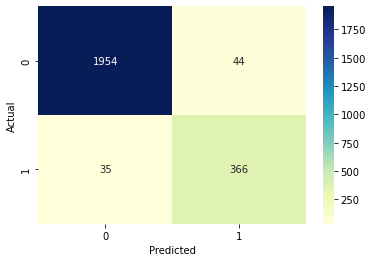

In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



What key insights emerged from your model(s)?

Key insights indicate that lower satisfaction levels, higher work hours, and longer tenure without promotion are significant predictors of turnover. This suggests that focusing on these areas could improve retention.
What business recommendations do you propose based on the models built?

Recommendations include improving employee satisfaction through regular surveys, monitoring work hours to prevent burnout, and creating clearer career advancement opportunities.
What potential recommendations would you make to your manager/company?

HR could implement wellness programs to reduce burnout and consider performance-based promotion policies to reward tenure and high performance.
Do you think your model could be improved? Why or why not? How?

Yes, the model could be improved by experimenting with other algorithms like Random Forests or Support Vector Machines, and by refining hyperparameters for better accuracy.
Given what you know about the data and the models you were using, what other questions could you address for the team?

Additional questions could explore specific department-level turnover rates, or if certain demographics (age, tenure) are more prone to turnover than others.
What resources do you find yourself using as you complete this stage?

Resources included Scikit-learn for model evaluation, and online articles on interpreting metrics like precision, recall, and F1-score for effective model evaluation.
Do you have any ethical considerations in this stage?

Ethical considerations include ensuring that recommendations do not lead to bias in HR policies, and that any actionable steps are applied consistently across departments to ensure fairness.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Decision Tree model provided high accuracy in predicting employee turnover, revealing that low satisfaction levels, lack of recent promotions, and high work hours are primary predictors. The model’s insights suggest that improving these areas could lead to higher employee retention


### Conclusion, Recommendations, Next Steps

Summarize Findings: Identify key factors influencing employee turnover.
Suggestions: Recommend policies based on insights, such as monitoring employees’ monthly hours, improving satisfaction, and supporting employees who haven’t been promoted recently.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.